# Проверка линейности

In [251]:
# General:
import numpy as np
# Graphics:
import seaborn as sns
from matplotlib import pyplot as plt
# ML:
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Mathematics:
from random import random, randint, uniform
import numpy.polynomial.polynomial as poly

def describe_plot(plot, title, xlabel, ylabel):
    plot.title(title)
    plot.xlabel(xlabel)
    plot.ylabel(ylabel)

FONT_BOLD, FONT_END = '\033[1m', '\033[0m'

BIAS  = 4.5
NOISE = 12
POPULATION_SIZE = 100
SAMPLE_SIZE     = int(POPULATION_SIZE/5)

# Сгенерируем более-менее гомоскедастичные данные, чтобы оценка стандартной ошибки не была смещена:
X, y, real_coef = make_regression(n_samples=POPULATION_SIZE, n_features=1, coef=True, noise=NOISE, bias=BIAS)

# # Отобразим данные и "истинную линию регрессии":
# print('Значения коэффициентов "истинной" регрессионной линии (из make_regression):')
# print('\tβ0 =', BIAS, '\n\tβ1 =', real_coef.item(0))
# # ---
# xx = np.linspace(min(X), max(X), 2)
# plt.plot(xx, xx*real_coef.item(0) + BIAS, c='r')
# plt.scatter(X, y, marker='.', c='c')
# describe_plot(plt, 
#               'Сгенерированные данные и "истинная" линия регрессии\nОбъём популяции n = ' + str(POPULATION_SIZE), 
#               'x', 'y')
# plt.grid(color='b', linestyle='-', linewidth=0.2)
# plt.show()

# # Вытянем выборку объёмом n и отобразим её:
# X_sample, _, y_sample, _ = train_test_split(X, y, test_size = POPULATION_SIZE-SAMPLE_SIZE)
# plt.scatter(X_sample, y_sample, marker='.', c='g')
# describe_plot(plt, 'Имеющаяся у нас в наличии выборка объёмом n = ' + str(SAMPLE_SIZE), 'x', 'y')
# plt.grid(color='b', linestyle='-', linewidth=0.2)
# plt.show()

Подгоним линейную регрессию к данным:

In [252]:
statsmodels_result = sm.OLS(y, sm.add_constant(X)).fit()

Проверить нелинейность можно с помощью одного из трёх графиков:
1. observed versus predicted values
2. residuals versus predicted values
3. residuals versus individual independent variables (для multiple regression)

# 1. Observed versus predicted values

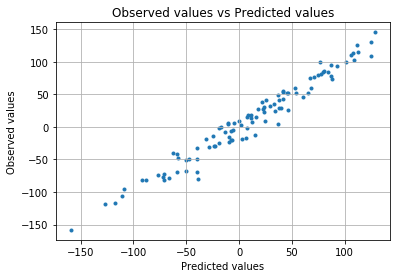

In [253]:
def observed_vs_predicted(y_pred, y):
    plt.clf()
    plt.scatter(statsmodels_result.fittedvalues, y, marker='.')
    plt.title('Observed values vs Predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Observed values')
    plt.grid()
    plt.show()
    
observed_vs_predicted(statsmodels_result.fittedvalues, y)

# 2. Residuals versus predicted values

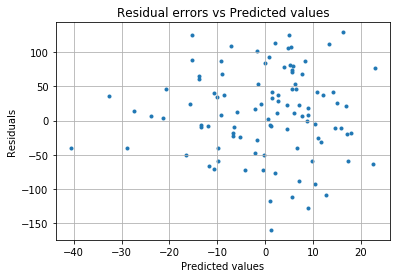

In [254]:
def residuals_vs_predicted(y_pred, residuals):
    plt.clf()
    plt.scatter(y_pred, residuals, marker='.')
    plt.title('Residual errors vs Predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.grid()
    plt.show()
    
residuals_vs_predicted(statsmodels_result.resid, statsmodels_result.fittedvalues)

# 3. Residuals versus individual independent variables (для multiple regression)

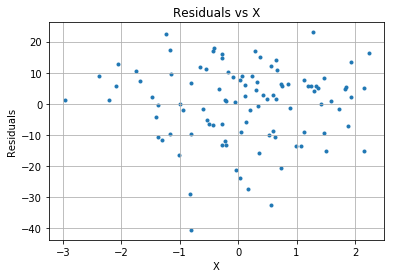

In [255]:
def residuals_vs_independent(X, residuals):
    plt.clf()
    plt.scatter(X, residuals, marker='.')
    plt.title('Residuals vs X')
    plt.xlabel('X')
    plt.ylabel('Residuals')
    plt.grid()
    plt.show()
    
residuals_vs_independent(X, statsmodels_result.resid)

# Теперь сгенерируем данные от параболы - нелинейная зависимость:

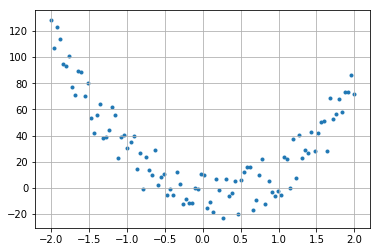

In [256]:
NOISE = 20

X = np.linspace(-2, 2, 100)
y = [((5*each - 1)**2 - 5) + NOISE*np.random.uniform(-1, 1) for each in X]
plt.clf()
plt.scatter(X, y, marker='.')
plt.grid()
plt.show()

statsmodels_result = sm.OLS(y, sm.add_constant(X)).fit()

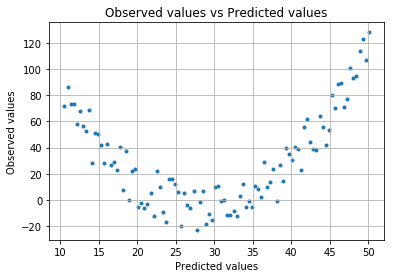

In [257]:
observed_vs_predicted(statsmodels_result.fittedvalues, y)

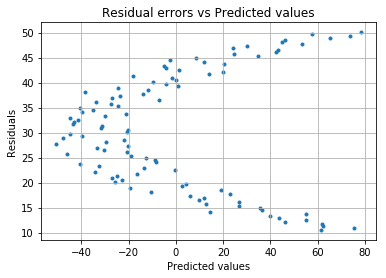

In [258]:
residuals_vs_predicted(statsmodels_result.resid, statsmodels_result.fittedvalues)

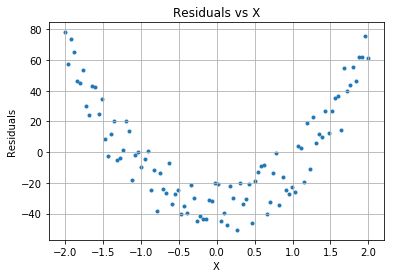

In [259]:
residuals_vs_independent(X, statsmodels_result.resid)

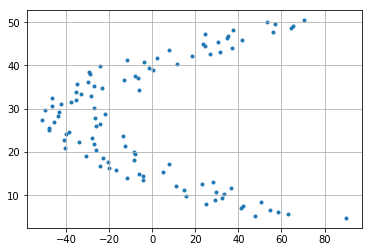

In [187]:
plt.clf()
plt.scatter(statsmodels_result.resid, statsmodels_result.fittedvalues, marker='.')
plt.grid()
plt.show()

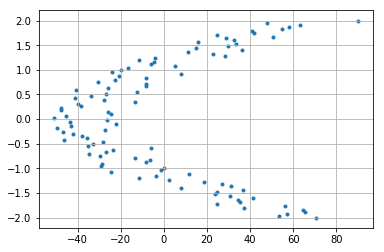

In [188]:
plt.clf()
plt.scatter(statsmodels_result.resid, X, marker='.')
plt.grid()
plt.show()

### --- Remedy?

In [189]:
a = X.copy()
A = np.vstack((a, np.square(a)))

statsmodels_result = sm.OLS(y, sm.add_constant(A.T)).fit()

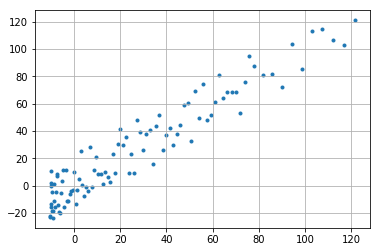

In [190]:
plt.clf()
plt.scatter(statsmodels_result.fittedvalues, y, marker='.')
plt.grid()
plt.show()

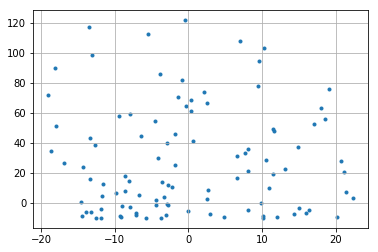

In [191]:
plt.clf()
plt.scatter(statsmodels_result.resid, statsmodels_result.fittedvalues, marker='.')
plt.grid()
plt.show()

# От 5 степени?

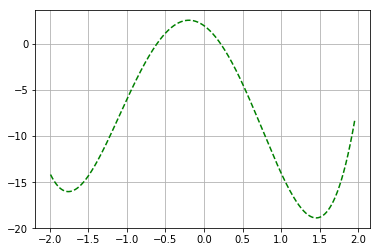

In [135]:
NOISE = 20

coefs = [2, -6, -15, 2, 3]
target = poly.Polynomial(coefs)

X = np.random.uniform(-2, 2, size=100)
y = [target(each) + uniform(-1, 1)*NOISE for each in X]

x_coords = np.linspace(min(X), max(X), num=len(X)*10)
plt.plot(x_coords, target(x_coords), c='g', ls='--', label='Target polynomial')
plt.grid()
plt.show()

statsmodels_result = sm.OLS(y, sm.add_constant(X)).fit()

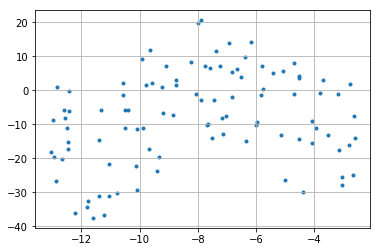

In [144]:
plt.clf()
plt.scatter(statsmodels_result.fittedvalues, y, marker='.')
plt.grid()
plt.show()

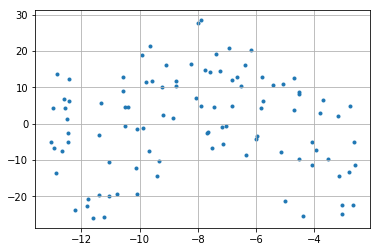

In [139]:
plt.clf()
plt.scatter(statsmodels_result.fittedvalues, statsmodels_result.resid, marker='.')
plt.grid()
plt.show()

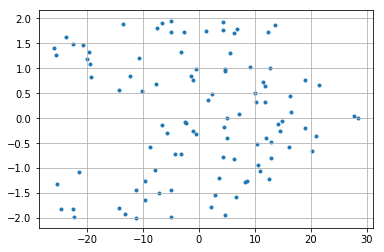

In [143]:
plt.clf()
plt.scatter(statsmodels_result.resid, X, marker='.')
plt.grid()
plt.show()

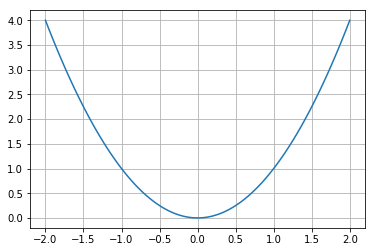

In [142]:
x = np.linspace(-2, 2, 100)
plt.plot(x, x**2)
plt.grid()
plt.show()